In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
%matplotlib inline 

In [45]:
data =pd.read_csv('./heart_2020_cleaned.csv')

In [46]:
data.shape

(319795, 18)

In [47]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [48]:
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [50]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

Оптимальное значение λ = -0.6727186978751638


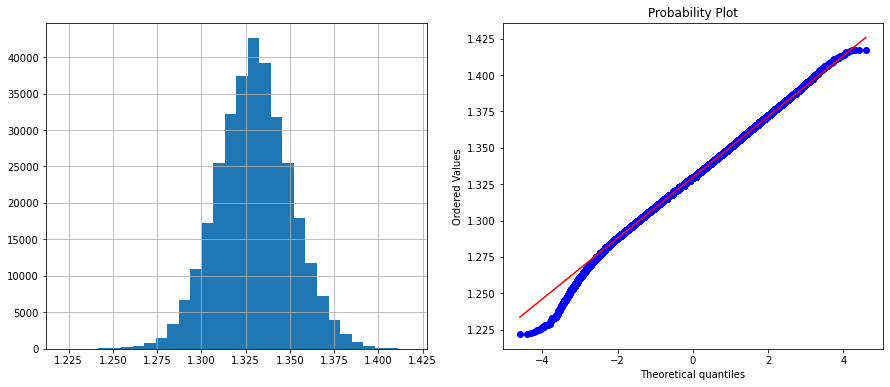

In [51]:
# Необходимо преобразовать данные к действительному типу
data['BMI_yeojohnson'], param = stats.yeojohnson(data['BMI']) 
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'BMI_yeojohnson')

In [65]:
data2 =pd.read_csv('./Height of Male and Female by Country 2022.csv')
data2.shape

(199, 6)

<AxesSubplot:>

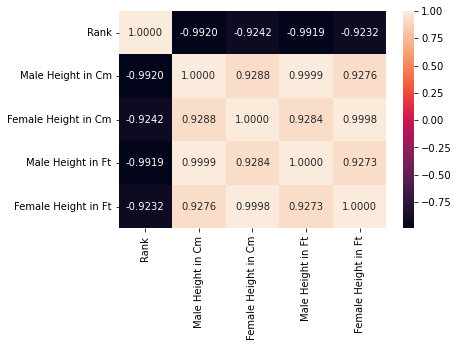

In [66]:
sns.heatmap(data2.corr(),annot=True,fmt=".4f")

In [67]:
data2.corr()

,Rank,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
Rank,1.000000,-0.992041,-0.924239,-0.991887,-0.923155
Male Height in Cm,-0.992041,1.000000,0.928787,0.999854,0.927642
Female Height in Cm,-0.924239,0.928787,1.000000,0.928406,0.999792
Male Height in Ft,-0.991887,0.999854,0.928406,1.000000,0.927259
Female Height in Ft,-0.923155,0.927642,0.999792,0.927259,1.000000


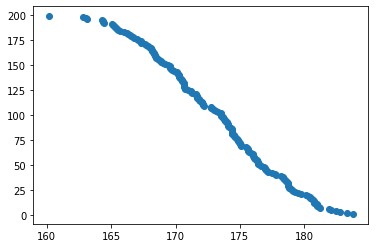

In [64]:
x=data2['Male Height in Cm']
y=data2['Rank']
plt.scatter(x, y)

In [58]:

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from category_encoders.count import CountEncoder as ce_CountEncoder
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [59]:
data1 =pd.read_csv('./heart_2020_cleaned.csv')

In [60]:
ce_CountEncoder2 = ce_CountEncoder(normalize=True)
data_FREQ_ENC = ce_CountEncoder2.fit_transform(data1[data1.columns.difference(['Survived'])])


In [12]:
X1=data_FREQ_ENC
y1=data_FREQ_ENC.HeartDisease
feature_names=X1.columns

Text(0, 0.5, 'Взаимная информация')

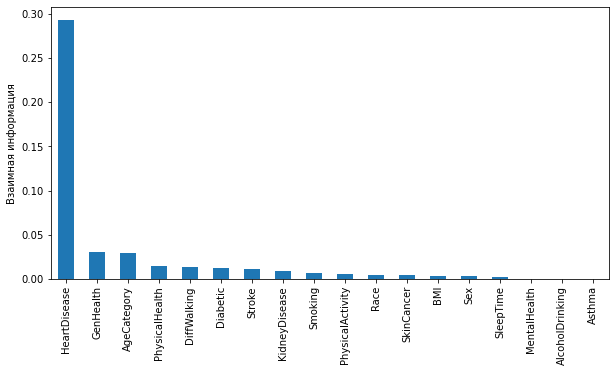

In [13]:
mi = mutual_info_regression(X1, y1)
mi = pd.Series(mi)
mi.index = feature_names
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Взаимная информация')

In [14]:
from sklearn.feature_selection import SelectPercentile,f_classif,chi2

def test_SelectKBest(X,y):

    selector=SelectPercentile(score_func=f_classif,percentile=5)
    selector.fit(X,y)
    print("selected index:",selector.get_support(True))
    
     #selector.fit(X,y)
    #list(zip(boston_feature_names, sel_mi.get_support()))
   # boston_feature_names[sel_mi.get_support()]
    #print("scores_:",selector.scores_)
    #print("selected index:",selector.get_support(True))
    #print("after transform:",selector.transform(X))
    

In [16]:
test_SelectKBest(X1,y1)


selected index: [7]


In [17]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)
X.shape



(1797, 64)

In [18]:
X_new = SelectPercentile(chi2, percentile=5).fit_transform(X, y)
X_new.shape




(1797, 4)

In [19]:
##此模型采用的titanic的数据集
import pandas as pd
titanic = pd.read_csv('./heart_2020_cleaned.csv')
##分离数据特征与预测目标
y = titanic['HeartDisease']
X = titanic.drop(['HeartDisease'],axis=1)
##对缺失数据进行填充
#X['age'].fillna(X['age'].mean(),inplace=True)
#X.fillna('UNKNOWN',inplace=True)
##分割数据,依然采用25%用于测试
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=33)
##类别型特征向量
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
X_train = vec.fit_transform(X_train.to_dict(orient='record'))
X_test = vec.transform(X_test.to_dict(orient='record'))  
##输出处理后特征向量的维度
print(len(vec.feature_names_))

C:\Users\XIA~1.BEI\AppData\Local\Temp/ipykernel_12864/1543537287.py:16: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  X_train = vec.fit_transform(X_train.to_dict(orient='record'))
C:\Users\XIA~1.BEI\AppData\Local\Temp/ipykernel_12864/1543537287.py:17: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  X_test = vec.transform(X_test.to_dict(orient='record'))


50


In [20]:
##使用决策树模型依靠所有特征进行预测,并作出性能评价
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.8677782086079876

In [21]:
from sklearn import feature_selection
#筛选前5%的特征,使用相同配置的决策树模型进行预测,并且评估性能
fs = feature_selection.SelectPercentile(feature_selection.chi2,percentile=5)
X_train_fs = fs.fit_transform(X_train,y_train)
dt.fit(X_train_fs,y_train)
X_test_fs = fs.transform(X_test)
dt.score(X_test_fs,y_test)


0.9141452676081001

In [ ]:
#from sklearn.model_selection import cross_val_score

In [ ]:
##通过交叉验证的方法,按照固定间隔的百分比筛选特征,并作图展示性能随
##特征筛选比例的变化
#import numpy as np
#percentiles = range(1,100,2)
#results = []

#for i in percentiles:
   # fs = feature_selection.SelectPercentile(feature_selection.chi2,percentile=i)
   # X_train_fs = fs.fit_transform(X_train,y_train)
   # scores = cross_val_score(dt,X_train_fs,y_train,cv=5)
   
#results = np.append(results,scores.mean())

#print(results)
##找到体现最佳性能特征筛选的百分比

#opt = np.where(results == results.max())[0][0]

#print('Optimal number of features %d' %percentiles[opt])

In [ ]:
#分布的可视化
#import pylab as pl
#pl.plot(percentiles,results)

#pl.xlabel('percentiles of features')

#pl.ylabel('accuracy')

#pl.show()

In [ ]:
##使用最佳筛选后的特征，利用相同配置的模型在测试集上进行性能评估
#from sklearn import feature_selection
#fs = feature_selection.SelectPercentile(feature_selection.chi2,percentile=7)
#X_train_fs = fs.fit_transform(X_train,y_train)
#dt.fit(X_train_fs,y_train)
#X_test_fs = fs.transform(X_test)
#dt.score(X_test_fs,y_test)